# Astro Project

In [1]:
# Imports and parameter setting

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits


%matplotlib inline
plt.style.use('seaborn-paper')
width = 3.404
height = width * .9
params = {
    'xtick.labelsize':8,
    'ytick.labelsize':8,
    'axes.labelsize':8,
    'legend.fontsize':8,
    'font.family':'serif',
}
mpl.rcParams.update(params)

In [2]:
# Get data
try:
    hdulist = fits.open('data/m35.fit')
    isosmaller = pd.read_table('data/iso1.tsv', header = 1, delim_whitespace=True)
    isolarger = pd.read_table('data/iso2.tsv', header = 1, delim_whitespace=True)
except FileNotFoundError:
    print('Data file missing')
    
print(isosmaller)
print(isolarger)

       #  Mass/Ms  Teff(K)  Log(L/Ls)      Log        g    Mbol      Mv  \
0   0.20   3522.5  -2.1828     5.0613  10.2011  11.7609  1.6220  2.4345   
1   0.25   3575.7  -2.0246     5.0261   9.8056  11.2885  1.6018  2.3630   
2   0.30   3617.0  -1.8975     4.9981   9.4878  10.9132  1.5848  2.3081   
3   0.35   3666.9  -1.7783     4.9697   9.1899  10.5494  1.5634  2.2446   
4   0.40   3739.8  -1.6446     4.9282   8.8557  10.1254  1.5314  2.1588   
5   0.45   3826.6  -1.5031     4.8777   8.5018   9.6544  1.4969  2.0758   
6   0.50   3928.1  -1.3574     4.8232   8.1376   9.1598  1.4569  1.9875   
7   0.55   4061.2  -1.2029     4.7680   7.7513   8.6340  1.3854  1.7207   
8   0.60   4218.8  -1.0476     4.7167   7.3632   8.1241  1.2693  1.4680   
9   0.65   4399.8  -0.8960     4.6728   6.9843   7.6292  1.1506  1.2764   
10  0.70   4626.0  -0.7478     4.6438   6.6135   7.1037  1.0316  1.1130   
11  0.75   4884.1  -0.6052     4.6256   6.2573   6.5924  0.9191  0.9715   
12  0.80   5144.1  -0.471

In order to prepare our isochrone data, which is given in absolute visual magnitude and actual color, by correcting for reddening and extinction. For our B-V data, we have from Sung, 99, reddening at 0.255 and a distance modulus of 9.6. We can then find the extinction using
$$
A_V=3.086\cdot E(B-V)
$$
This means we can find the visual magnitude via the following
$$
V_{obs}=M_V + 5 log(D) + 5 + A_V
$$
So you can see that our isochrone can be fit by taking our distance modulus and extinction and adding it to the Mv data. We can correct our B-V using the reddening. For the other color indexes we can correct the color by finding the difference in $A_\lambda$ and $A_V$ which can be written using only $A_V$ using the Johnson-Cousins photometric table. 

In [3]:
data = pd.DataFrame(hdulist[1].data)
isochrone = pd.DataFrame(hdulist[3].data)

ebv = 0.255
Av = 3.086 * ebv
evi = Av * (1 - 0.482)
eub = .024 * (1.531 - 1.324)

isochrone['V'] = isochrone['Mv']+9.6+Av
isochrone['B-V(cor)'] = isochrone['B-V']+ebv
isochrone['V-I(cor)'] = isochrone['V-Ic']+evi
mask = isochrone['V'] < max(data['Vmag'])

isosmaller['V'] = isosmaller['Mv']+9.6+Av
isosmaller['B-V(cor)'] = isosmaller['B-V']+ebv
isosmaller['V-I(cor)'] = isosmaller['V-Ic']+evi
mask2 = isosmaller['V'] < max(data['Vmag'])

isolarger['V'] = isolarger['Mv']+9.6+Av
isolarger['B-V(cor)'] = isolarger['B-V']+ebv
isolarger['V-I(cor)'] = isolarger['V-Ic']+evi
mask3 = isolarger['V'] < max(data['Vmag'])

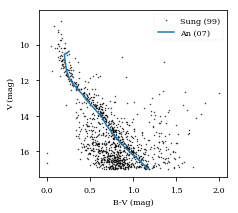

In [11]:
style = dict(color='k',ms=1.5, alpha=0.75, label='Sung (99)')

plt.plot('B-V', 'Vmag', 'o', data=data, **style)
plt.gca().invert_yaxis()
plt.xlabel('B-V (mag)')
plt.ylabel('V (mag)')
plt.legend(loc='best', frameon=True)

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/b-v.pdf')

plt.plot(isochrone['B-V(cor)'], isochrone['V'].where(mask), linewidth=1.5, label='An (07)')
# plt.plot(isolarger['B-V(cor)'], isolarger['V'].where(mask2), linewidth=1.5, label='An (07)')
# plt.plot(isosmaller['B-V(cor)'], isosmaller['V'].where(mask3), linewidth=1.5, label='An (07)')

plt.legend(loc='best', frameon=True)
# plt.legend?

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/b-vISO.pdf')

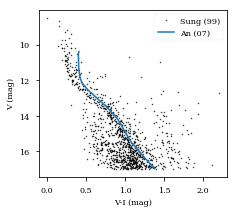

In [5]:
plt.plot('V-I', 'Vmag', 'o', data=data, **style)
plt.gca().invert_yaxis()
plt.xlabel('V-I (mag)')
plt.ylabel('V (mag)')
plt.legend(loc='best', frameon=True)

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/v-i.pdf')


plt.plot(isochrone['V-I(cor)'], isochrone['V'].where(mask), linewidth=1.5, label='An (07)')
plt.legend(loc='best', frameon=True)

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/v-iISO.pdf')

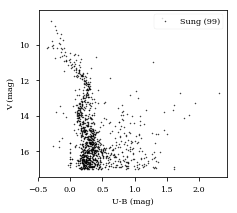

In [6]:
plt.plot('U-B', 'Vmag', 'o', data=data, **style)
plt.gca().invert_yaxis()
plt.xlabel('U-B (mag)')
plt.ylabel('V (mag)')
plt.legend(loc='best', frameon=True)

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/u-b.pdf')

In [7]:
# hdulist.close()